1- Cargar bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split

2- Obtener datos

In [2]:
ruta= "./src/data_sample/alquiler/"

archivos_alquiler= list(os.listdir(ruta))
print(archivos_alquiler)
dfs={}

for fichero in archivos_alquiler:
    nombre_df= fichero
    ruta_fichero= ruta+fichero
    df= pd.read_csv(ruta_fichero)
    dfs[fichero]= df
df_total_alquiler= pd.concat(dfs.values(), ignore_index=True)

df_total_alquiler


['a_abril_2025.csv', 'a_agosto_2025.csv', 'a_diciembre_2025.csv', 'a_enero_2025.csv', 'a_febrero_2025.csv', 'a_julio_2025.csv', 'a_junio_2025.csv', 'a_marzo_2025.csv', 'a_mayo_2025.csv', 'a_noviembre_2025.csv', 'a_octubre_2025.csv', 'a_septiembre_2025.csv']


Fuente    Referencia Operación      Tipología  \
0      milanuncios     542368069  Alquiler  Plurifamiliar   
1         Fotocasa        003003  Alquiler  Plurifamiliar   
2      milanuncios     542363878  Alquiler  Plurifamiliar   
3       habitaclia         12486  Alquiler  Plurifamiliar   
4       habitaclia  63591cc6e76f  Alquiler  Plurifamiliar   
...            ...           ...       ...            ...   
23995   habitaclia      12411086  Alquiler  Plurifamiliar   
23996     Fotocasa        993852  Alquiler  Plurifamiliar   
23997   habitaclia     AV2509040  Alquiler  Plurifamiliar   
23998     Fotocasa          2464  Alquiler  Plurifamiliar   
23999  milanuncios     557139948  Alquiler  Plurifamiliar   

                                                  Título     C.P. Municipio  \
0                                       Valencia Capital  46020.0  Valencia   
1      Piso en Alquiler en  Historiador Diago, Arranc...  46007.0  Valencia   
2                                       Valencia Capital  46013.0  Valencia   
3      SE ALQUILA PISO DE TRES HABITACIONES EN BENIMA...      NaN  Valencia   
4                      Excelente piso en la zona del rio      NaN  Valencia   
...                                                  ...      ...       ...   
23995  Vivienda a estrenar con garaje y trastero incl...      NaN  Valencia   
23996  Piso en Alquiler en  Calle del Transformador, ...  46025.0  Valencia   
23997                     Piso en alquiler en Benimaclet      NaN  Valencia   
23998  Piso en Alquiler en  Alameda, Penya - Roja - A...  46023.0  Valencia   
23999                                   Valencia Capital  46026.0  Valencia   

      Provincia         Distrito                        Barrio  ...  \
0      Valencia       Benimaclet          Barrio de Benimaclet  ...   
1      Valencia        Extramurs                   Arrancapins  ...   
2      Valencia  Quatre Carreres         Fonteta de Sant Lluís  ...   
3      Valencia       Benimaclet          Barrio de Benimaclet  ...   
4      Valencia  Quatre Carreres                   Mont-Olivet  ...   
...         ...              ...                           ...  ...   
23995  Valencia  Quatre Carreres         Fonteta de Sant Lluís  ...   
23996  Valencia        Benicalap           Barrio de Benicalap  ...   
23997  Valencia       Benimaclet          Barrio de Benimaclet  ...   
23998  Valencia   Camins al Grau  Penya - Roja - Avda. Francia  ...   
23999  Valencia  Quatre Carreres                       Malilla  ...   

       Descartado         Estado Ranking Dormitorios Baños Superficie Precio  \
0              No  No contactado     279         3.0   1.0         85    900   
1              No  No contactado    2583         2.0   2.0         80    800   
2              No  No contactado    7976         1.0   1.0         48   1100   
3              No  No contactado    5585         3.0   1.0         85    900   
4              No  No contactado    8716         3.0   2.0        106   1400   
...           ...            ...     ...         ...   ...        ...    ...   
23995          No  No contactado    4605         1.0   1.0         47   1100   
23996          No  No contactado    3230         2.0   1.0         52   1100   
23997          No  No contactado    5934         4.0   2.0        110   1400   
23998          No  No contactado    3419         1.0   1.0         76   1500   
23999          No  No contactado    6431         2.0   2.0         85   1060   

      Precio unitario  Días   Demanda  
0                10.0   1.0  Muy alta  
1                10.0   1.0  Moderada  
2                22.0   1.0  Muy baja  
3                10.0   1.0  Muy baja  
4                13.0   1.0  Muy baja  
...               ...   ...       ...  
23995            23.0  20.0  Muy baja  
23996            21.0  20.0  Moderada  
23997            12.0   2.0  Muy baja  
23998            19.0  20.0      Baja  
23999            12.0  12.0  Muy baja  

[24000 rows x 41 columns]

In [4]:
ruta= "./src/data_sample/ventas/"

archivos_alquiler= list(os.listdir(ruta))
print(archivos_alquiler)
dfs={}

for fichero in archivos_alquiler:
    nombre_df= fichero
    ruta_fichero= ruta+fichero
    df= pd.read_csv(ruta_fichero)
    dfs[fichero]= df
df_total_ventas= pd.concat(dfs.values(), ignore_index=True)

print(len(df_total_ventas))
df_total_ventas

['v_abril_2025.csv', 'v_agosto_2025.csv', 'v_diciembre_2025.csv', 'v_enero_2025.csv', 'v_febrero_2025.csv', 'v_julio_2025.csv', 'v_junio_2025.csv', 'v_marzo_2025.csv', 'v_mayo_2025.csv', 'v_noviembre_2025.csv', 'v_octubre_2025.csv', 'v_septiembre_2025.csv']
24000


Fuente  Referencia Operación      Tipología  \
0         Fotocasa     0292687     Venta  Plurifamiliar   
1       habitaclia        2629     Venta  Plurifamiliar   
2      milanuncios   542365647     Venta  Plurifamiliar   
3         Fotocasa  25VIV06586     Venta  Plurifamiliar   
4       habitaclia  25VIV06586     Venta  Plurifamiliar   
...            ...         ...       ...            ...   
23995   habitaclia    64-03483     Venta  Plurifamiliar   
23996  milanuncios   557691756     Venta  Plurifamiliar   
23997  milanuncios   557632670     Venta  Plurifamiliar   
23998   habitaclia  LCV37757-1     Venta  Plurifamiliar   
23999     Fotocasa         NaN     Venta  Plurifamiliar   

                                                  Título     C.P. Municipio  \
0                           Piso en Venta en Arrancapins  46007.0  Valencia   
1      Vive la Valencia más auténtica en esta joya  e...      NaN  Valencia   
2                                       Valencia Capital  46009.0  Valencia   
3      Piso en Venta en  PADRE PEDRO VELASCO, 5, La M...  46011.0  Valencia   
4                                                    NaN      NaN  Valencia   
...                                                  ...      ...       ...   
23995                             Venta piso en Valencia      NaN  Valencia   
23996                                   Valencia Capital  46007.0  Valencia   
23997               Barrio del Carmen - Carrer de Pinzón  46003.0  Valencia   
23998                                                NaN      NaN  Valencia   
23999  Piso en Venta en  Carrer de Sant Joan Bosco, 8...  46019.0  Valencia   

      Provincia          Distrito         Barrio  ...  Descartado  \
0      Valencia         Extramurs    Arrancapins  ...          No   
1      Valencia         La Saïdia    Sant Antoni  ...          No   
2      Valencia         La Saïdia    Sant Antoni  ...          No   
3      Valencia  Poblats Marítims  La Malva-rosa  ...          No   
4      Valencia  Poblats Marítims  La Malva-rosa  ...          No   
...         ...               ...            ...  ...         ...   
23995  Valencia   Quatre Carreres       La Punta  ...          No   
23996  Valencia             Jesús      La Raïosa  ...          No   
23997  Valencia      Ciutat Vella       El Carme  ...          No   
23998  Valencia  Poblats Marítims        El Grau  ...          No   
23999  Valencia          Rascanya        Orriols  ...          No   

              Estado Ranking Dormitorios Baños Superficie  Precio  \
0      No contactado    9421         4.0   2.0        129  530000   
1      No contactado    4728         1.0   1.0         78  250000   
2      No contactado    3671         1.0   1.0         78  250000   
3      No contactado     280         3.0   1.0         64   58500   
4      No contactado   10154         3.0   1.0         64   58500   
...              ...     ...         ...   ...        ...     ...   
23995  No contactado     345         4.0   1.0        100  165000   
23996  No contactado      43         3.0   2.0        101  315000   
23997  No contactado    6241         3.0   2.0         87  349900   
23998  No contactado    5419         3.0   2.0        111  330000   
23999  No contactado     684         3.0   1.0         55  108000   

      Precio unitario Días   Demanda  
0                4108    1  Muy baja  
1                3205    1  Muy baja  
2                3205    1  Muy baja  
3                 914    1      Alta  
4                 914    1  Muy baja  
...               ...  ...       ...  
23995            1650    3      Alta  
23996            3118   17  Muy alta  
23997            4021   17  Muy baja  
23998            2972   17  Muy baja  
23999            1963    4  Muy alta  

[24000 rows x 41 columns]

In [5]:
df= pd.concat([df_total_ventas,df_total_alquiler])
df.to_excel("Dataframe.xlsx", index=False)

c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\worksheet.py:1321: UserWarning: Ignoring URL 'https://www.habitaclia.com/i9518002675643' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\worksheet.py:1321: UserWarning: Ignoring URL 'https://www.habitaclia.com/i2726004419793' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\worksheet.py:1321: UserWarning: Ignoring URL 'https://www.milanuncios.com/anuncios/r567589024.htm' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
c:\Users\priet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\worksheet.py:1321: UserWarning: Ignoring URL 'https://www.milanuncios.com/anuncios/r567633126.htm' since it exceeds Excel's limit of 65,530 URLs per worksheet.
  warn(
c:\Users\pri

In [6]:
df.head()

Fuente  Referencia Operación      Tipología  \
0     Fotocasa     0292687     Venta  Plurifamiliar   
1   habitaclia        2629     Venta  Plurifamiliar   
2  milanuncios   542365647     Venta  Plurifamiliar   
3     Fotocasa  25VIV06586     Venta  Plurifamiliar   
4   habitaclia  25VIV06586     Venta  Plurifamiliar   

                                              Título     C.P. Municipio  \
0                       Piso en Venta en Arrancapins  46007.0  Valencia   
1  Vive la Valencia más auténtica en esta joya  e...      NaN  Valencia   
2                                   Valencia Capital  46009.0  Valencia   
3  Piso en Venta en  PADRE PEDRO VELASCO, 5, La M...  46011.0  Valencia   
4                                                NaN      NaN  Valencia   

  Provincia          Distrito         Barrio  ...  Descartado         Estado  \
0  Valencia         Extramurs    Arrancapins  ...          No  No contactado   
1  Valencia         La Saïdia    Sant Antoni  ...          No  No contactado   
2  Valencia         La Saïdia    Sant Antoni  ...          No  No contactado   
3  Valencia  Poblats Marítims  La Malva-rosa  ...          No  No contactado   
4  Valencia  Poblats Marítims  La Malva-rosa  ...          No  No contactado   

  Ranking Dormitorios Baños Superficie  Precio Precio unitario Días   Demanda  
0    9421         4.0   2.0        129  530000          4108.0  1.0  Muy baja  
1    4728         1.0   1.0         78  250000          3205.0  1.0  Muy baja  
2    3671         1.0   1.0         78  250000          3205.0  1.0  Muy baja  
3     280         3.0   1.0         64   58500           914.0  1.0      Alta  
4   10154         3.0   1.0         64   58500           914.0  1.0  Muy baja  

[5 rows x 41 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 0 to 23999
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuente              48000 non-null  object 
 1   Referencia          46376 non-null  object 
 2   Operación           48000 non-null  object 
 3   Tipología           48000 non-null  object 
 4   Título              44046 non-null  object 
 5   C.P.                32093 non-null  float64
 6   Municipio           48000 non-null  object 
 7   Provincia           48000 non-null  object 
 8   Distrito            47996 non-null  object 
 9   Barrio              45288 non-null  object 
 10  Latitud             48000 non-null  float64
 11  Longitud            48000 non-null  float64
 12  Planta              40138 non-null  object 
 13  Anunciante          48000 non-null  object 
 14  Empresa             46643 non-null  object 
 15  Aire acondicionado  48000 non-null  object 
 16  Ascensor 

In [8]:
# nulos
# print(df.isnull().sum()/len(df)*100)
# creando el indice de referencia
df["Referencia_interna"]= df["Latitud"].astype(str).replace(".","")+ df["Longitud"].astype(str).replace(".","")
df["Referencia_interna"]

0        39.4664874858-0.3811585142
1        39.4883637946-0.3721260874
2        39.4879188989-0.3725709831
3                39.4781988-0.32921
4                39.4781988-0.32921
                    ...            
23995          39.4461182-0.3654679
23996    39.4940344899-0.3935838101
23997    39.4847111258-0.3565108742
23998    39.4550180899-0.3420149101
23999    39.4464774009-0.3811166681
Name: Referencia_interna, Length: 48000, dtype: object

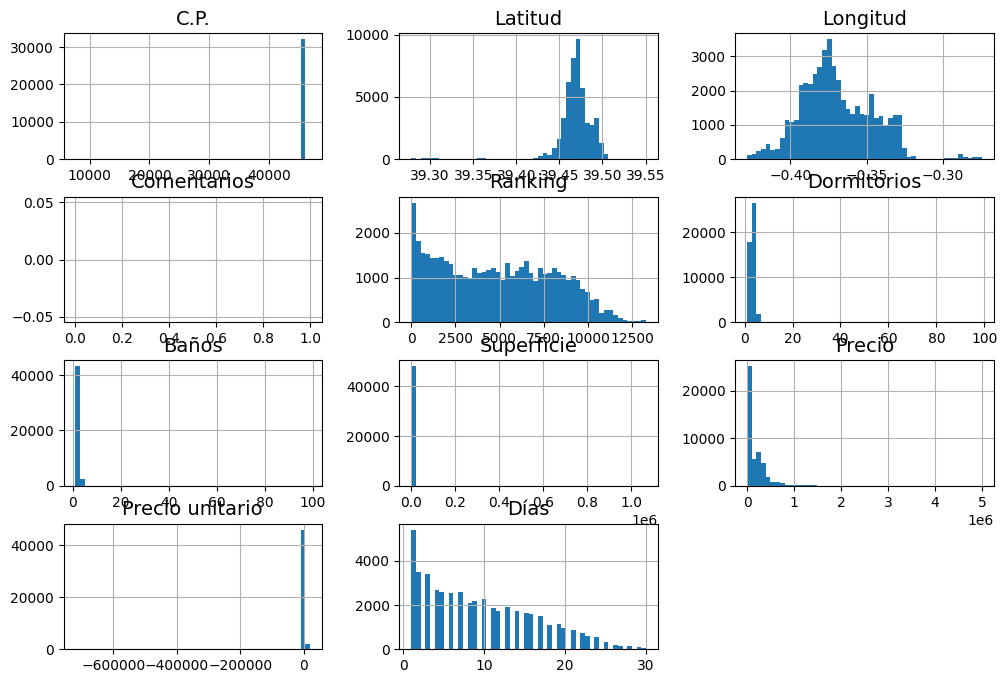

In [9]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

3- Separar Train y test

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
len(train_set)

In [ ]:
len(test_set)

4 - Proceso de "EDA"